In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score, roc_curve

In [54]:
data = pd.read_csv('custom.csv')
data.head()

data1 = load_iris()
data1 = pd.DataFrame(data1.data, columns=data1.feature_names)
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
iris_data = load_iris()

x = iris_data.data
y = iris_data.target
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, test_size=0.2, random_state=42)


In [58]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [66]:
def KNN(x_train, y_train, x_text,k):
    y_pred = []
    for sample in x_text:
        distances = [np.linalg.norm(np.array(sample)- np.array(x_train_sample)) for x_train_sample in x_train]
        votes = np.argsort(distances)[:k]
        vote_class = [y_train[i] for i in votes]
        vote_result = Counter(vote_class).most_common()[0][0]
        print(vote_result)
        y_pred.append(vote_result)

    return np.array(y_pred)


In [67]:
Y_pred = KNN(x_train =x_train1, y_train = y_train1, x_text= x_test1, k =5)

1
0
2
1
1
0
1
2
1
1
2
0
0
0
0
1
2
1
1
2
0
2
0
2
2
2
2
2
0
0


In [69]:
accuracy = accuracy_score(y_test1, Y_pred)
accuracy

1.0

In [43]:
cl_report = classification_report(y_test1, Y_pred)
print("Classification Report:\n", cl_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [44]:
f1_score = f1_score(y_test1, Y_pred, average='weighted')
print(f'F1 Score: {f1_score:.2f}')

F1 Score: 1.00


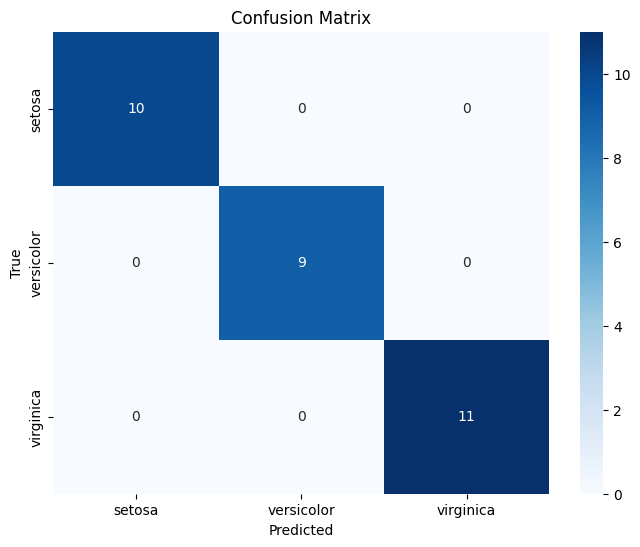

In [45]:
conf_matrix = confusion_matrix(y_test1, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(data= conf_matrix, annot=True, cmap='Blues', xticklabels=iris_data.target_names, yticklabels=iris_data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

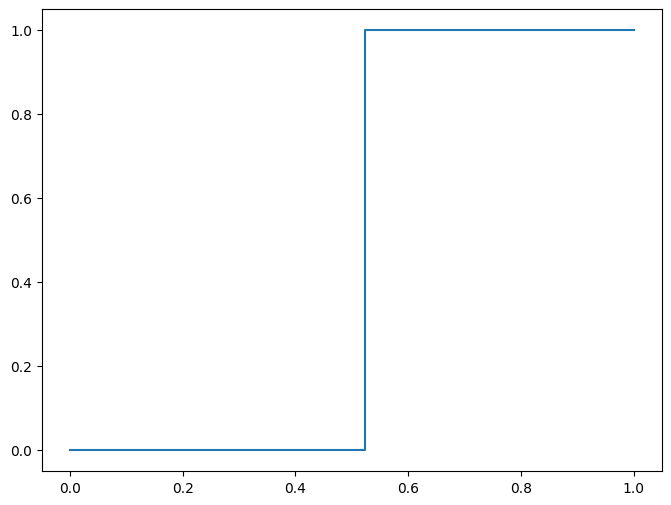

In [46]:
fpr, tpr, thresholds = roc_curve(y_test1, Y_pred, pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.show()